# COLLEGE AND UNIVERSITIES

## Load Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.preprocessing import StandardScaler  # For scaling dataset
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation 

from sklearn.model_selection import train_test_split

from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict

from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
from sklearn.feature_selection import RFECV

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor

from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

from tensorflow.keras.utils import to_categorical
from iteration_utilities import deepflatten

import warnings
warnings.filterwarnings('ignore')

## Data collection

### Colleges_and_Universities.csv

In [2]:
df = pd.read_csv('Colleges_and_Universities.csv')

df.head()

,X,Y,FID,IPEDSID,NAME,ADDRESS,ADDRESS2,CITY,STATE,ZIP,...,ALIAS,SIZE_SET,INST_SIZE,PT_ENROLL,FT_ENROLL,TOT_ENROLL,HOUSING,DORM_CAP,TOT_EMPLOY,SHELTER_ID
0,-92.260490,34.759308,7001,107840,Shorter College,604 Locust St,NOT AVAILABLE,N Little Rock,AR,72114,...,NOT AVAILABLE,-3,1,24,28,52,2,0,18,NOT AVAILABLE
1,-121.289431,38.713353,7002,112181,Citrus Heights Beauty College,7518 Baird Way,NOT AVAILABLE,Citris Heights,CA,95610,...,NOT AVAILABLE,-3,1,6,24,30,2,0,9,NOT AVAILABLE
2,-118.287070,34.101481,7003,116660,Joe Blasco Makeup Artist Training Center,1670 Hillhurst Avenue,NOT AVAILABLE,Los Angeles,CA,90027,...,NOT AVAILABLE,-3,1,0,24,24,2,0,11,NOT AVAILABLE
3,-121.652662,36.700631,7004,125310,Waynes College of Beauty,1271 North Main Street,NOT AVAILABLE,Salinas,CA,93906,...,NOT AVAILABLE,-3,1,18,16,34,2,0,9,NOT AVAILABLE
4,-71.070737,42.369930,7005,164368,Hult International Business School,1 Education Street,NOT AVAILABLE,Cambridge,MA,02141,...,NOT AVAILABLE,-3,2,0,2243,2243,2,0,143,NOT AVAILABLE


In [3]:
df.shape

(7735, 46)

In [4]:
df.dtypes

X             float64
Y             float64
FID             int64
IPEDSID         int64
NAME           object
ADDRESS        object
ADDRESS2       object
CITY           object
STATE          object
ZIP            object
ZIP4           object
TELEPHONE      object
TYPE            int64
STATUS         object
POPULATION      int64
COUNTY         object
COUNTYFIPS      int64
COUNTRY        object
LATITUDE      float64
LONGITUDE     float64
NAICS_CODE      int64
NAICS_DESC     object
SOURCE         object
SOURCE_DAT     object
VAL_METHOD     object
VAL_DATE       object
WEBSITE        object
STFIPS          int64
COFIPS          int64
SECTOR          int64
LEVEL_          int64
HI_OFFER        int64
DEG_GRANT       int64
LOCALE          int64
CLOSE_DATE     object
MERGE_ID        int64
ALIAS          object
SIZE_SET        int64
INST_SIZE       int64
PT_ENROLL       int64
FT_ENROLL       int64
TOT_ENROLL      int64
HOUSING         int64
DORM_CAP        int64
TOT_EMPLOY      int64
SHELTER_ID

In [5]:
df.describe()

,X,Y,FID,IPEDSID,TYPE,POPULATION,COUNTYFIPS,LATITUDE,LONGITUDE,NAICS_CODE,...,LOCALE,MERGE_ID,SIZE_SET,INST_SIZE,PT_ENROLL,FT_ENROLL,TOT_ENROLL,HOUSING,DORM_CAP,TOT_EMPLOY
count,7735.000000,7735.000000,7735.000000,7735.000000,7735.000000,7735.000000,7735.000000,7735.000000,7735.000000,7735.000000,...,7735.000000,7735.00000,7735.000000,7735.000000,7735.000000,7735.000000,7735.000000,7735.00000,7735.00000,7735.000000
mean,-90.506517,37.425260,3868.000000,281864.075889,2.201034,3233.846800,29196.812023,37.425260,-90.506517,611360.962379,...,19.491920,424.98927,1.787977,1.577893,1032.233355,1727.344796,2759.578151,1.63245,388.18384,474.268649
std,17.595184,5.800367,2233.046499,131529.530737,0.842711,7826.541161,16713.057137,5.800367,17.595184,131.336865,...,9.381378,9463.44996,5.878855,1.077236,3006.886573,4790.666270,6695.364257,0.70059,1199.39176,1488.795583
min,-170.743175,-14.323171,1.000000,100636.000000,-3.000000,0.000000,-999.000000,-14.323171,-170.743175,611210.000000,...,-3.000000,-2.00000,-3.000000,-2.000000,0.000000,0.000000,0.000000,-2.00000,0.00000,0.000000
25%,-97.362353,33.990664,1934.500000,170270.500000,1.000000,140.000000,13121.000000,33.990664,-97.362353,611210.000000,...,12.000000,-2.00000,-3.000000,1.000000,0.000000,81.000000,114.000000,1.00000,0.00000,20.000000
50%,-86.663047,38.855847,3868.000000,222886.000000,2.000000,514.000000,29147.000000,38.855847,-86.663047,611310.000000,...,21.000000,-2.00000,-2.000000,1.000000,59.000000,318.000000,434.000000,2.00000,0.00000,74.000000
75%,-79.225690,41.392206,5801.500000,440314.000000,3.000000,2657.500000,42029.000000,41.392206,-79.225690,611511.000000,...,21.000000,-2.00000,5.000000,2.000000,600.000000,1415.000000,2232.500000,2.00000,105.00000,383.000000
max,171.378442,71.324702,7735.000000,480569.000000,3.000000,227548.000000,78030.000000,71.324702,171.378442,611710.000000,...,43.000000,443544.00000,18.000000,5.000000,65310.000000,204920.000000,204920.000000,2.00000,16018.00000,28018.000000


## Data Cleanning

### Step 1: Check if there is any missing data

**Are there any missing values?**

In [6]:
df.isnull().sum()

X             0
Y             0
FID           0
IPEDSID       0
NAME          0
ADDRESS       0
ADDRESS2      0
CITY          0
STATE         0
ZIP           0
ZIP4          0
TELEPHONE     0
TYPE          0
STATUS        0
POPULATION    0
COUNTY        0
COUNTYFIPS    0
COUNTRY       0
LATITUDE      0
LONGITUDE     0
NAICS_CODE    0
NAICS_DESC    0
SOURCE        0
SOURCE_DAT    0
VAL_METHOD    0
VAL_DATE      0
WEBSITE       0
STFIPS        0
COFIPS        0
SECTOR        0
LEVEL_        0
HI_OFFER      0
DEG_GRANT     0
LOCALE        0
CLOSE_DATE    0
MERGE_ID      0
ALIAS         0
SIZE_SET      0
INST_SIZE     0
PT_ENROLL     0
FT_ENROLL     0
TOT_ENROLL    0
HOUSING       0
DORM_CAP      0
TOT_EMPLOY    0
SHELTER_ID    0
dtype: int64

In [7]:
df.isnull().sum() * 100 / len(df)

X             0.0
Y             0.0
FID           0.0
IPEDSID       0.0
NAME          0.0
ADDRESS       0.0
ADDRESS2      0.0
CITY          0.0
STATE         0.0
ZIP           0.0
ZIP4          0.0
TELEPHONE     0.0
TYPE          0.0
STATUS        0.0
POPULATION    0.0
COUNTY        0.0
COUNTYFIPS    0.0
COUNTRY       0.0
LATITUDE      0.0
LONGITUDE     0.0
NAICS_CODE    0.0
NAICS_DESC    0.0
SOURCE        0.0
SOURCE_DAT    0.0
VAL_METHOD    0.0
VAL_DATE      0.0
WEBSITE       0.0
STFIPS        0.0
COFIPS        0.0
SECTOR        0.0
LEVEL_        0.0
HI_OFFER      0.0
DEG_GRANT     0.0
LOCALE        0.0
CLOSE_DATE    0.0
MERGE_ID      0.0
ALIAS         0.0
SIZE_SET      0.0
INST_SIZE     0.0
PT_ENROLL     0.0
FT_ENROLL     0.0
TOT_ENROLL    0.0
HOUSING       0.0
DORM_CAP      0.0
TOT_EMPLOY    0.0
SHELTER_ID    0.0
dtype: float64

### Step 2: Remove the irrelevant observations

**Drop the unnecessary data column**

In [8]:
df.drop(['X', 'Y', 'FID', 'ADDRESS2', 'ZIP4', 'TELEPHONE', 'TYPE', 'STATUS', 'SOURCE','SOURCE_DAT', 'VAL_METHOD', 'VAL_DATE', 'WEBSITE', 'SECTOR', 'LEVEL_','HI_OFFER', 'DEG_GRANT', 'LOCALE', 'CLOSE_DATE', 'MERGE_ID', 'ALIAS', 'SIZE_SET', 'HOUSING', 'DORM_CAP', 'SHELTER_ID'], inplace=True, axis=1)

## Describing the Data

In [9]:
df.shape

(7735, 21)

In [10]:
df.dtypes

IPEDSID         int64
NAME           object
ADDRESS        object
CITY           object
STATE          object
ZIP            object
POPULATION      int64
COUNTY         object
COUNTYFIPS      int64
COUNTRY        object
LATITUDE      float64
LONGITUDE     float64
NAICS_CODE      int64
NAICS_DESC     object
STFIPS          int64
COFIPS          int64
INST_SIZE       int64
PT_ENROLL       int64
FT_ENROLL       int64
TOT_ENROLL      int64
TOT_EMPLOY      int64
dtype: object

In [11]:
df.describe()

,IPEDSID,POPULATION,COUNTYFIPS,LATITUDE,LONGITUDE,NAICS_CODE,STFIPS,COFIPS,INST_SIZE,PT_ENROLL,FT_ENROLL,TOT_ENROLL,TOT_EMPLOY
count,7735.000000,7735.000000,7735.000000,7735.000000,7735.000000,7735.000000,7735.000000,7735.000000,7735.000000,7735.000000,7735.000000,7735.000000,7735.000000
mean,281864.075889,3233.846800,29196.812023,37.425260,-90.506517,611360.962379,29.152165,83.819134,1.577893,1032.233355,1727.344796,2759.578151,474.268649
std,131529.530737,7826.541161,16713.057137,5.800367,17.595184,131.336865,16.704485,103.618466,1.077236,3006.886573,4790.666270,6695.364257,1488.795583
min,100636.000000,0.000000,-999.000000,-14.323171,-170.743175,611210.000000,1.000000,-999.000000,-2.000000,0.000000,0.000000,0.000000,0.000000
25%,170270.500000,140.000000,13121.000000,33.990664,-97.362353,611210.000000,13.000000,29.000000,1.000000,0.000000,81.000000,114.000000,20.000000
50%,222886.000000,514.000000,29147.000000,38.855847,-86.663047,611310.000000,29.000000,61.000000,1.000000,59.000000,318.000000,434.000000,74.000000
75%,440314.000000,2657.500000,42029.000000,41.392206,-79.225690,611511.000000,42.000000,107.000000,2.000000,600.000000,1415.000000,2232.500000,383.000000
max,480569.000000,227548.000000,78030.000000,71.324702,171.378442,611710.000000,78.000000,840.000000,5.000000,65310.000000,204920.000000,204920.000000,28018.000000


## Additional Dataset 

### co-est2021-alldata.csv

In [12]:
population = pd.read_csv('co-est2021-alldata.csv', encoding= 'unicode_escape')

In [13]:
population

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,ESTIMATESBASE2020,POPESTIMATE2020,POPESTIMATE2021,...,RESIDUAL2021,GQESTIMATESBASE2020,GQESTIMATES2020,GQESTIMATES2021,RBIRTH2021,RDEATH2021,RNATURALCHG2021,RINTERNATIONALMIG2021,RDOMESTICMIG2021,RNETMIG2021
0,40,3,6,1,0,Alabama,Alabama,5024279,5024803,5039877,...,242,114572,114572,114572,11.191613,12.890226,-1.698613,0.247201,4.398749,4.645950
1,50,3,6,1,1,Alabama,Autauga County,58805,58877,59095,...,8,442,442,442,11.002611,11.545112,-0.542502,0.084766,4.017903,4.102668
2,50,3,6,1,3,Alabama,Baldwin County,231767,233140,239294,...,-82,2177,2177,2177,9.567474,12.137145,-2.569671,0.266704,28.702422,28.969126
3,50,3,6,1,5,Alabama,Barbour County,25223,25180,24964,...,1,2789,2789,2789,10.928526,15.714742,-4.786216,0.039885,-3.908743,-3.868858
4,50,3,6,1,7,Alabama,Bibb County,22293,22223,22477,...,-1,2062,2062,2062,10.111857,12.617450,-2.505593,0.089485,13.825503,13.914989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3189,50,4,8,56,37,Wyoming,Sweetwater County,42272,42158,41614,...,-4,720,720,720,11.483551,9.549730,1.933820,0.429738,-15.255694,-14.825956
3190,50,4,8,56,39,Wyoming,Teton County,23331,23347,23575,...,1,215,215,215,9.377264,4.091897,5.285367,0.340991,4.049273,4.390265
3191,50,4,8,56,41,Wyoming,Uinta County,20450,20441,20635,...,0,187,187,187,11.003993,8.082579,2.921414,0.146071,6.378420,6.524491
3192,50,4,8,56,43,Wyoming,Washakie County,7685,7658,7705,...,-1,119,119,119,9.893901,14.971034,-5.077133,0.000000,11.325913,11.325913


In [14]:
population.dtypes

SUMLEV                     int64
REGION                     int64
DIVISION                   int64
STATE                      int64
COUNTY                     int64
STNAME                    object
CTYNAME                   object
ESTIMATESBASE2020          int64
POPESTIMATE2020            int64
POPESTIMATE2021            int64
NPOPCHG2020                int64
NPOPCHG2021                int64
BIRTHS2020                 int64
BIRTHS2021                 int64
DEATHS2020                 int64
DEATHS2021                 int64
NATURALCHG2020             int64
NATURALCHG2021             int64
INTERNATIONALMIG2020       int64
INTERNATIONALMIG2021       int64
DOMESTICMIG2020            int64
DOMESTICMIG2021            int64
NETMIG2020                 int64
NETMIG2021                 int64
RESIDUAL2020               int64
RESIDUAL2021               int64
GQESTIMATESBASE2020        int64
GQESTIMATES2020            int64
GQESTIMATES2021            int64
RBIRTH2021               float64
RDEATH2021

In [15]:
population.describe()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,ESTIMATESBASE2020,POPESTIMATE2020,POPESTIMATE2021,NPOPCHG2020,NPOPCHG2021,...,RESIDUAL2021,GQESTIMATESBASE2020,GQESTIMATES2020,GQESTIMATES2021,RBIRTH2021,RDEATH2021,RNATURALCHG2021,RINTERNATIONALMIG2021,RDOMESTICMIG2021,RNETMIG2021
count,3194.000000,3194.000000,3194.000000,3194.000000,3194.000000,3.194000e+03,3.194000e+03,3.194000e+03,3194.000000,3194.000000,...,3194.000000,3194.000000,3194.000000,3194.000000,3194.000000,3194.000000,3194.000000,3194.000000,3194.000000,3194.000000
mean,49.840326,2.669067,5.192549,30.250157,101.845335,2.075449e+05,2.075774e+05,2.078233e+05,32.435191,245.876644,...,0.000000,4859.648716,4859.648716,4859.648716,10.476861,12.679550,-2.202689,0.346609,4.977854,5.324463
std,1.253691,0.807730,1.974832,15.159773,107.576954,1.269954e+06,1.269952e+06,1.269011e+06,2217.319165,12021.429239,...,125.328544,28286.520532,28286.520532,28286.520532,2.396415,3.293721,4.349472,0.700890,14.365999,14.258942
min,40.000000,1.000000,1.000000,1.000000,0.000000,6.400000e+01,6.700000e+01,5.700000e+01,-46316.000000,-319020.000000,...,-3645.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-32.258065,-1.295197,-112.903226,-112.903226
25%,50.000000,2.000000,4.000000,18.000000,33.000000,1.097425e+04,1.092850e+04,1.094275e+04,-52.750000,-75.000000,...,-2.000000,139.000000,139.000000,139.000000,9.108967,10.558537,-4.908418,0.000000,-2.475981,-2.169724
50%,50.000000,3.000000,5.000000,29.000000,77.000000,2.657950e+04,2.653750e+04,2.641100e+04,-13.000000,32.500000,...,1.000000,553.500000,553.500000,553.500000,10.371332,12.778106,-2.327026,0.147322,3.796239,4.193642
75%,50.000000,3.000000,7.000000,45.000000,133.000000,7.408775e+04,7.390850e+04,7.400625e+04,20.000000,312.750000,...,5.000000,2288.500000,2288.500000,2288.500000,11.658382,14.810587,0.249733,0.426908,11.860913,12.157585
max,50.000000,4.000000,9.000000,56.000000,840.000000,3.953822e+07,3.949974e+07,3.923784e+07,72148.000000,310288.000000,...,1285.000000,815696.000000,815696.000000,815696.000000,29.072202,48.387097,19.022552,17.299737,80.717489,80.717489


## Data Cleaning

### Step 1: Check if there is any missing data

**Are there any missing values?**

In [16]:
population.isnull().sum()

SUMLEV                   0
REGION                   0
DIVISION                 0
STATE                    0
COUNTY                   0
STNAME                   0
CTYNAME                  0
ESTIMATESBASE2020        0
POPESTIMATE2020          0
POPESTIMATE2021          0
NPOPCHG2020              0
NPOPCHG2021              0
BIRTHS2020               0
BIRTHS2021               0
DEATHS2020               0
DEATHS2021               0
NATURALCHG2020           0
NATURALCHG2021           0
INTERNATIONALMIG2020     0
INTERNATIONALMIG2021     0
DOMESTICMIG2020          0
DOMESTICMIG2021          0
NETMIG2020               0
NETMIG2021               0
RESIDUAL2020             0
RESIDUAL2021             0
GQESTIMATESBASE2020      0
GQESTIMATES2020          0
GQESTIMATES2021          0
RBIRTH2021               0
RDEATH2021               0
RNATURALCHG2021          0
RINTERNATIONALMIG2021    0
RDOMESTICMIG2021         0
RNETMIG2021              0
dtype: int64

In [17]:
population.isnull().sum() * 100 / len(population)

SUMLEV                   0.0
REGION                   0.0
DIVISION                 0.0
STATE                    0.0
COUNTY                   0.0
STNAME                   0.0
CTYNAME                  0.0
ESTIMATESBASE2020        0.0
POPESTIMATE2020          0.0
POPESTIMATE2021          0.0
NPOPCHG2020              0.0
NPOPCHG2021              0.0
BIRTHS2020               0.0
BIRTHS2021               0.0
DEATHS2020               0.0
DEATHS2021               0.0
NATURALCHG2020           0.0
NATURALCHG2021           0.0
INTERNATIONALMIG2020     0.0
INTERNATIONALMIG2021     0.0
DOMESTICMIG2020          0.0
DOMESTICMIG2021          0.0
NETMIG2020               0.0
NETMIG2021               0.0
RESIDUAL2020             0.0
RESIDUAL2021             0.0
GQESTIMATESBASE2020      0.0
GQESTIMATES2020          0.0
GQESTIMATES2021          0.0
RBIRTH2021               0.0
RDEATH2021               0.0
RNATURALCHG2021          0.0
RINTERNATIONALMIG2021    0.0
RDOMESTICMIG2021         0.0
RNETMIG2021   

No missing data (NaN)

### Step 2: Get desired observations for further analysis

**Get the necessary data columns**

In [18]:
population = population[['STATE', 'COUNTY', 'POPESTIMATE2021']]

In [19]:
population

,STATE,COUNTY,POPESTIMATE2021
0,1,0,5039877
1,1,1,59095
2,1,3,239294
3,1,5,24964
4,1,7,22477
...,...,...,...
3189,56,37,41614
3190,56,39,23575
3191,56,41,20635
3192,56,43,7705


## Describing the Data

In [20]:
population.shape

(3194, 3)

In [21]:
population.dtypes

STATE              int64
COUNTY             int64
POPESTIMATE2021    int64
dtype: object

In [22]:
population.describe()

,STATE,COUNTY,POPESTIMATE2021
count,3194.000000,3194.000000,3.194000e+03
mean,30.250157,101.845335,2.078233e+05
std,15.159773,107.576954,1.269011e+06
min,1.000000,0.000000,5.700000e+01
25%,18.000000,33.000000,1.094275e+04
50%,29.000000,77.000000,2.641100e+04
75%,45.000000,133.000000,7.400625e+04
max,56.000000,840.000000,3.923784e+07


In [23]:
population.nunique()

STATE                51
COUNTY              326
POPESTIMATE2021    3142
dtype: int64

## Data Transformation

### Normalization

Data before normalization is performed on the data:

In [24]:
df[['POPULATION', 'LATITUDE', 'LONGITUDE', 'INST_SIZE', 'PT_ENROLL', 'FT_ENROLL', 'TOT_ENROLL', 'TOT_EMPLOY']]

,POPULATION,LATITUDE,LONGITUDE,INST_SIZE,PT_ENROLL,FT_ENROLL,TOT_ENROLL,TOT_EMPLOY
0,70,34.759308,-92.260490,1,24,28,52,18
1,39,38.713353,-121.289431,1,6,24,30,9
2,35,34.101481,-118.287070,1,0,24,24,11
3,43,36.700631,-121.652662,1,18,16,34,9
4,2386,42.369930,-71.070737,2,0,2243,2243,143
...,...,...,...,...,...,...,...,...
7730,163,41.347074,-72.042638,1,119,19,138,25
7731,3470,39.482878,-80.160335,2,772,2415,3187,283
7732,0,33.895708,-118.236350,1,0,0,0,0
7733,752,34.042875,-84.176526,1,227,441,668,84


Data after normalization is performed on the data:

In [25]:
sc = MinMaxScaler(feature_range = (0, 1))
df_min_max_scaled = df.copy()
#fit: get min/max of train data
col_list = [col for col in df.columns.tolist() if df[col].dtype.name != "object"]

df_min_max_scaled[col_list] = sc.fit_transform(df[col_list])
df_min_max_scaled[['POPULATION', 'LATITUDE', 'LONGITUDE', 'INST_SIZE', 'PT_ENROLL', 'FT_ENROLL', 'TOT_ENROLL', 'TOT_EMPLOY']]

,POPULATION,LATITUDE,LONGITUDE,INST_SIZE,PT_ENROLL,FT_ENROLL,TOT_ENROLL,TOT_EMPLOY
0,0.000308,0.573073,0.229400,0.428571,0.000367,0.000137,0.000254,0.000642
1,0.000171,0.619239,0.144550,0.428571,0.000092,0.000117,0.000146,0.000321
2,0.000154,0.565392,0.153326,0.428571,0.000000,0.000117,0.000117,0.000393
3,0.000189,0.595739,0.143488,0.428571,0.000276,0.000078,0.000166,0.000321
4,0.010486,0.661932,0.291336,0.571429,0.000000,0.010946,0.010946,0.005104
...,...,...,...,...,...,...,...,...
7730,0.000716,0.649990,0.288495,0.428571,0.001822,0.000093,0.000673,0.000892
7731,0.015250,0.628224,0.264768,0.571429,0.011821,0.011785,0.015552,0.010101
7732,0.000000,0.562990,0.153474,0.428571,0.000000,0.000000,0.000000,0.000000
7733,0.003305,0.564708,0.253029,0.428571,0.003476,0.002152,0.003260,0.002998


### Merging

Merging is the process of combining two or more datasets into a single dataset. 
<br><br>
In our datasets, outer merging is performed to allow us to unify and better understand the data when analyzing it.

In [26]:
df_merge = df.copy()

In [27]:
population.rename(columns={"STATE": "STFIPS", "COUNTY": "COFIPS"}, inplace=True)
population

,STFIPS,COFIPS,POPESTIMATE2021
0,1,0,5039877
1,1,1,59095
2,1,3,239294
3,1,5,24964
4,1,7,22477
...,...,...,...
3189,56,37,41614
3190,56,39,23575
3191,56,41,20635
3192,56,43,7705


In [28]:
df_merge = df_merge.merge(population, how='left')
df_merge

,IPEDSID,NAME,ADDRESS,CITY,STATE,ZIP,POPULATION,COUNTY,COUNTYFIPS,COUNTRY,...,NAICS_CODE,NAICS_DESC,STFIPS,COFIPS,INST_SIZE,PT_ENROLL,FT_ENROLL,TOT_ENROLL,TOT_EMPLOY,POPESTIMATE2021
0,107840,Shorter College,604 Locust St,N Little Rock,AR,72114,70,Pulaski,5119,US,...,611210,Junior Colleges,5,119,1,24,28,52,18,397821.0
1,112181,Citrus Heights Beauty College,7518 Baird Way,Citris Heights,CA,95610,39,Sacramento,6067,US,...,611511,Cosmetology and Barber Schools,6,67,1,6,24,30,9,1588921.0
2,116660,Joe Blasco Makeup Artist Training Center,1670 Hillhurst Avenue,Los Angeles,CA,90027,35,Los Angeles,6037,US,...,611511,Cosmetology and Barber Schools,6,37,1,0,24,24,11,9829544.0
3,125310,Waynes College of Beauty,1271 North Main Street,Salinas,CA,93906,43,Monterey,6053,US,...,611511,Cosmetology and Barber Schools,6,53,1,18,16,34,9,437325.0
4,164368,Hult International Business School,1 Education Street,Cambridge,MA,02141,2386,Middlesex,25017,US,...,611310,"Colleges, Universities, and Professional Schools",25,17,2,0,2243,2243,143,1614742.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7730,443483,Connecticut Center for Massage Therapy-Groton,1154 Poquonnock Rd,Groton,CT,06340,163,New London,9011,US,...,611519,Other Technical and Trade Schools,9,11,1,119,19,138,25,268805.0
7731,443492,Pierpont Community and Technical College,1201 Locust Ave,Fairmont,WV,26554,3470,Marion,54049,US,...,611210,Junior Colleges,54,49,2,772,2415,3187,283,56001.0
7732,443517,Universal College of Beauty Inc-Compton,718 West Compton Blvd,Compton,CA,90220,0,Los Angeles,6037,US,...,611710,Educational Support Services/Closed,6,37,1,0,0,0,0,9829544.0
7733,443526,ITT Technical Institute-Duluth,10700 Abbotts Bridge Rd-Ste 190,Duluth,GA,30097,752,Fulton,13121,US,...,611310,"Colleges, Universities, and Professional Schools",13,121,1,227,441,668,84,1065334.0


In [29]:
df_merge.isnull().sum()

IPEDSID              0
NAME                 0
ADDRESS              0
CITY                 0
STATE                0
ZIP                  0
POPULATION           0
COUNTY               0
COUNTYFIPS           0
COUNTRY              0
LATITUDE             0
LONGITUDE            0
NAICS_CODE           0
NAICS_DESC           0
STFIPS               0
COFIPS               0
INST_SIZE            0
PT_ENROLL            0
FT_ENROLL            0
TOT_ENROLL           0
TOT_EMPLOY           0
POPESTIMATE2021    175
dtype: int64

In [30]:
df_merge.dropna(inplace=True)

In [31]:
df_merge['POPESTIMATE2021'] = (df_merge['POPESTIMATE2021'].to_numpy()[:, None] * 0.072)
df_merge['POPESTIMATE2021'] = df_merge['POPESTIMATE2021'].astype(int)

### Binning

Bining is a process of grouping or categorizing numeric data into discrete bins or discrete baskets, which is one of the ways of dealing with noisy data.
<br><br>
In this data, binning is performed on the ‘TOT_ENROLL’ variable, and we bin it into 3 bins, which are ‘Low’, ‘Medium’, and ‘High’ to simplify the analysis.

In [32]:
df_min_max_scaled['TOT_ENROLL'].dtype

dtype('float64')

In order to get an idea on how the values are distributed, we use matplotlib library to plot the histogram.

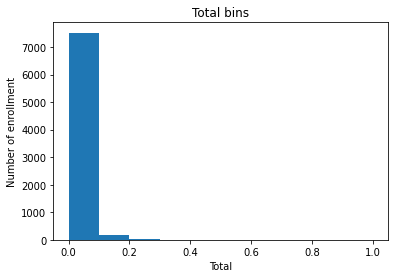

In [33]:
plt.hist(df_min_max_scaled['TOT_ENROLL'])

# set x/y labels and plot title
plt.xlabel('Total')
plt.ylabel('Number of enrollment')
plt.title('Total bins').figure.savefig('TotalEnroll_Histogram.png')

We want 3 bins of equal size, therefore we use Numpy's `linspace(start_value, end_value, numbers_generated)` function. 
<br><br>
In order to build 3 bins, we need to define 4 dividers or boundaries:

In [34]:
bins = np.linspace(min(df['TOT_ENROLL']), max(df['TOT_ENROLL']), 4)
bins

array([     0.        ,  68306.66666667, 136613.33333333, 204920.        ])

So these are the dividers of the 3 bins, if we were to give it the starting value, ending value, and the number of values to be generated at equal intervals.

The bin group names is created as shown below:

In [35]:
group_names = ['Low', 'Medium', 'High']

In [36]:
df['BINNED_TOT_ENROLL'] = pd.cut(df['TOT_ENROLL'], bins, labels=group_names, include_lowest=True )
df[['TOT_ENROLL','BINNED_TOT_ENROLL']].head()

,TOT_ENROLL,BINNED_TOT_ENROLL
0,52,Low
1,30,Low
2,24,Low
3,34,Low
4,2243,Low


In [37]:
df['BINNED_TOT_ENROLL'].value_counts()

Low       7730
Medium       4
High         1
Name: BINNED_TOT_ENROLL, dtype: int64

In [38]:
df['BINNED_TOT_ENROLL'] = df['BINNED_TOT_ENROLL'].astype(str)

In order to get an idea on how the values are distributed, we use matplotlib library to plot the histogram.

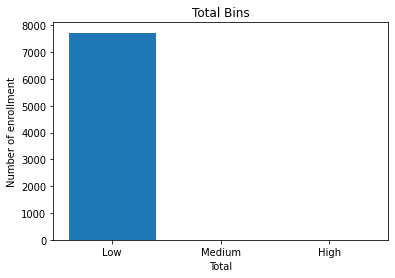

In [39]:
plt.bar(group_names, df['BINNED_TOT_ENROLL'].value_counts())

# set x/y labels and plot title 
plt.xlabel('Total')
plt.ylabel('Number of enrollment')
plt.title('Total Bins').figure.savefig('Binned_Enrollment.png')

## Data Transformation

### Clustering

In [40]:
x = df[['LONGITUDE', 'LATITUDE']]
ss = StandardScaler()
X = ss.fit_transform(x)

print(X) 

[[-0.09969125 -0.45964748]
 [-1.74962101  0.22208539]
 [-1.57897459 -0.57306609]
 ...
 [-1.5760918  -0.60854424]
 [ 0.35978031 -0.58317059]
 [ 0.41973224  0.44922468]]


In [41]:
model = KMeans(n_clusters = 3, verbose=0)   #build the model
model.fit(X)

KMeans(n_clusters=3)

In [42]:
kmeans_labels = pd.DataFrame(model.labels_)   # put into a DataFrame. We will use this shortly...
kmeans_labels

,0
0,1
1,2
2,2
3,2
4,0
...,...
7730,0
7731,0
7732,2
7733,1


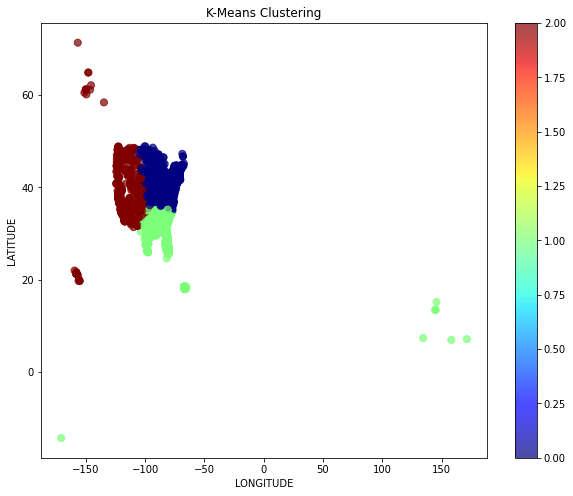

In [43]:
def plot_kmeans_scatter(v1, v2):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    scatter = ax.scatter(v1, v2, c=kmeans_labels[0],s=50,cmap='jet',alpha=0.7)
    ax.set_title('K-Means Clustering')
    ax.set_xlabel(v1.name)
    ax.set_ylabel(v2.name)
    plt.colorbar(scatter)
    plt.show()
    ax.figure.savefig('K-Means.png')

v1 = df['LONGITUDE']
v2 = df['LATITUDE']
plot_kmeans_scatter(v1, v2)

## Exploratory Data Analysis

### Descriptive Question

**“What is the maximum number of part-time enrollment and full-time enrollment of students of colleges and universities in the US?”**

In [44]:
max_pt = df['PT_ENROLL'].max()
max_ft = df['FT_ENROLL'].max()
print('Max number of part-time enrollment:', max_pt)
print('Max number of full-time enrollment:', max_ft)

Max number of part-time enrollment: 65310
Max number of full-time enrollment: 204920


### Exploratory Question

**“What is the relationship between the population and the total enrollment of the colleges and universities students in the US?”**

**Data Visualization**

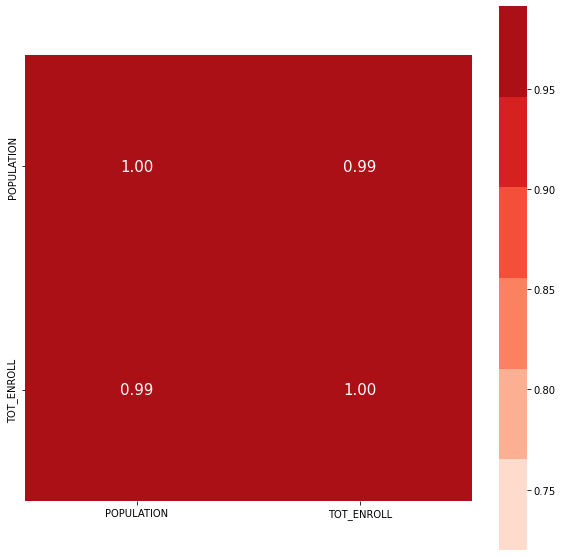

In [45]:
corr_list = list(['POPULATION', 'TOT_ENROLL'])
corr = df[corr_list].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr , vmax=.8, square=True, annot=True, fmt= '.2f', annot_kws={'size': 15}, cmap=sns.color_palette("Reds")).figure.savefig('Heatmap.png')

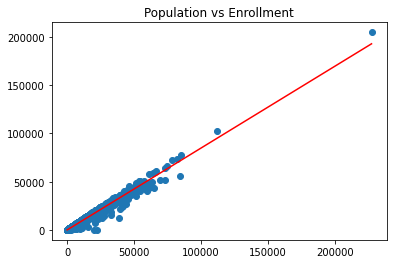

In [46]:
plt.scatter(df['POPULATION'],df['TOT_ENROLL'])
plt.plot(np.unique(df['POPULATION']), np.poly1d(np.polyfit(df['POPULATION'], df['TOT_ENROLL'], 1))
         (np.unique(df['POPULATION'])), color='red')
plt.title('Population vs Enrollment').figure.savefig('Population_vs_Enrollment_Regplot_All.png')

### Inferential Question

**“The larger population of the state is linked with a higher total enrollment of college or university. Is this hypothesis also true for the California population?”**

In [47]:
df1 = df.copy()

In [48]:
filter = df1['STATE'] == 'CA'
df1 = df1[filter]
df1.head()

,IPEDSID,NAME,ADDRESS,CITY,STATE,ZIP,POPULATION,COUNTY,COUNTYFIPS,COUNTRY,...,NAICS_CODE,NAICS_DESC,STFIPS,COFIPS,INST_SIZE,PT_ENROLL,FT_ENROLL,TOT_ENROLL,TOT_EMPLOY,BINNED_TOT_ENROLL
1,112181,Citrus Heights Beauty College,7518 Baird Way,Citris Heights,CA,95610,39,Sacramento,6067,US,...,611511,Cosmetology and Barber Schools,6,67,1,6,24,30,9,Low
2,116660,Joe Blasco Makeup Artist Training Center,1670 Hillhurst Avenue,Los Angeles,CA,90027,35,Los Angeles,6037,US,...,611511,Cosmetology and Barber Schools,6,37,1,0,24,24,11,Low
3,125310,Waynes College of Beauty,1271 North Main Street,Salinas,CA,93906,43,Monterey,6053,US,...,611511,Cosmetology and Barber Schools,6,53,1,18,16,34,9,Low
9,395195,Colton-Redlands-Yucaipa Regional Occupational ...,1214 Indiana Ct,Redlands,CA,92374,231,San Bernardino,6071,US,...,611519,Other Technical and Trade Schools,6,71,1,0,142,142,89,Low
14,475097,International Culinary Center-California,700 West Hamilton Avenue,Campbell,CA,95008,123,Santa Clara,6085,US,...,611519,Other Technical and Trade Schools,6,85,1,20,54,74,49,Low


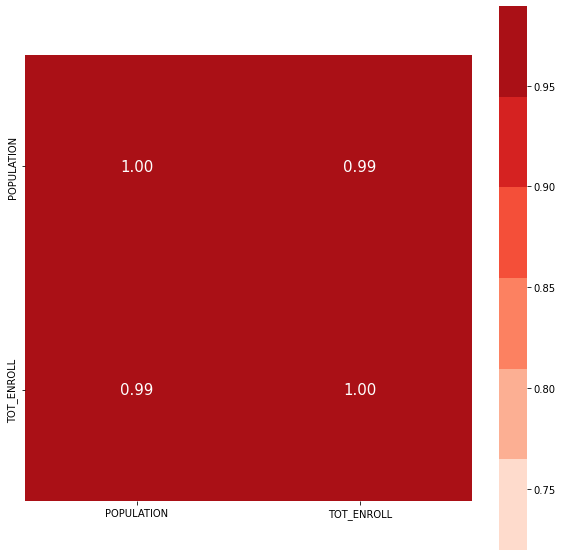

In [49]:
corr_list = list(['POPULATION', 'TOT_ENROLL'])
corr = df1[corr_list].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr , vmax=.8, square=True, annot=True, fmt= '.2f', annot_kws={'size': 15}, cmap=sns.color_palette("Reds")).figure.savefig('Heatmap1.png')

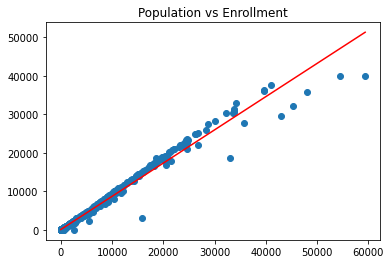

In [50]:
plt.scatter(df1['POPULATION'],df1['TOT_ENROLL'])
plt.plot(np.unique(df1['POPULATION']), np.poly1d(np.polyfit(df1['POPULATION'], df1['TOT_ENROLL'], 1))
         (np.unique(df1['POPULATION'])), color='red')
plt.title('Population vs Enrollment').figure.savefig('Population_vs_Enrollment_Regplot_CA.png')

### Predictive Question

**“What is the predicted mean of the total enrolled students in the junior colleges by the end of 2021?”**

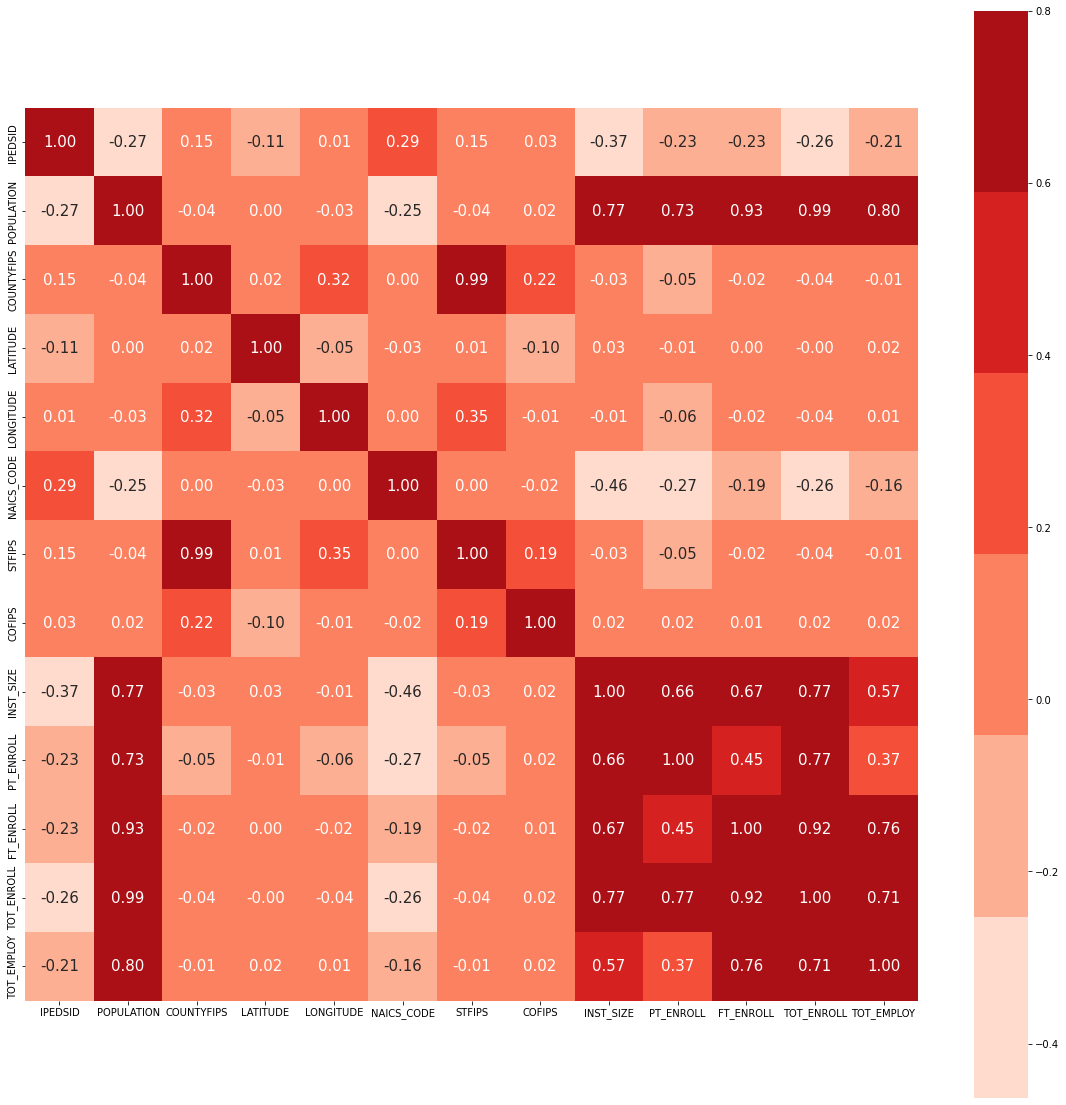

In [51]:
corr = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr , vmax=.8, square=True, annot=True, fmt= '.2f', annot_kws={'size': 15}, cmap=sns.color_palette("Reds")).figure.savefig('Heatmap2.png')

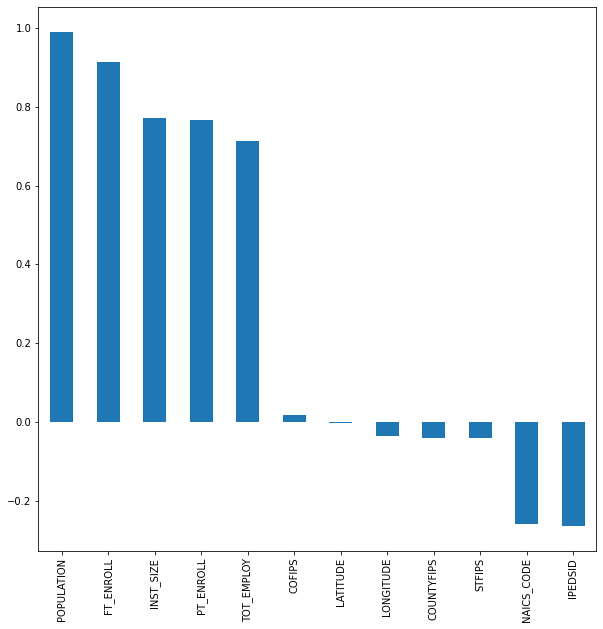

In [52]:
corr_with_enroll = df.corr()["TOT_ENROLL"].sort_values(ascending=False)
plt.figure(figsize=(10,10))
corr_with_enroll.drop("TOT_ENROLL").plot.bar().figure.savefig('Correlation_Bar.png')
plt.show()

In [53]:
df

,IPEDSID,NAME,ADDRESS,CITY,STATE,ZIP,POPULATION,COUNTY,COUNTYFIPS,COUNTRY,...,NAICS_CODE,NAICS_DESC,STFIPS,COFIPS,INST_SIZE,PT_ENROLL,FT_ENROLL,TOT_ENROLL,TOT_EMPLOY,BINNED_TOT_ENROLL
0,107840,Shorter College,604 Locust St,N Little Rock,AR,72114,70,Pulaski,5119,US,...,611210,Junior Colleges,5,119,1,24,28,52,18,Low
1,112181,Citrus Heights Beauty College,7518 Baird Way,Citris Heights,CA,95610,39,Sacramento,6067,US,...,611511,Cosmetology and Barber Schools,6,67,1,6,24,30,9,Low
2,116660,Joe Blasco Makeup Artist Training Center,1670 Hillhurst Avenue,Los Angeles,CA,90027,35,Los Angeles,6037,US,...,611511,Cosmetology and Barber Schools,6,37,1,0,24,24,11,Low
3,125310,Waynes College of Beauty,1271 North Main Street,Salinas,CA,93906,43,Monterey,6053,US,...,611511,Cosmetology and Barber Schools,6,53,1,18,16,34,9,Low
4,164368,Hult International Business School,1 Education Street,Cambridge,MA,02141,2386,Middlesex,25017,US,...,611310,"Colleges, Universities, and Professional Schools",25,17,2,0,2243,2243,143,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7730,443483,Connecticut Center for Massage Therapy-Groton,1154 Poquonnock Rd,Groton,CT,06340,163,New London,9011,US,...,611519,Other Technical and Trade Schools,9,11,1,119,19,138,25,Low
7731,443492,Pierpont Community and Technical College,1201 Locust Ave,Fairmont,WV,26554,3470,Marion,54049,US,...,611210,Junior Colleges,54,49,2,772,2415,3187,283,Low
7732,443517,Universal College of Beauty Inc-Compton,718 West Compton Blvd,Compton,CA,90220,0,Los Angeles,6037,US,...,611710,Educational Support Services/Closed,6,37,1,0,0,0,0,Low
7733,443526,ITT Technical Institute-Duluth,10700 Abbotts Bridge Rd-Ste 190,Duluth,GA,30097,752,Fulton,13121,US,...,611310,"Colleges, Universities, and Professional Schools",13,121,1,227,441,668,84,Low


In [54]:
df_junior = df_merge.copy()

In [55]:
filter = df_junior['NAICS_DESC'] == 'Junior Colleges'
df_junior = df_junior[filter]
df_junior

,IPEDSID,NAME,ADDRESS,CITY,STATE,ZIP,POPULATION,COUNTY,COUNTYFIPS,COUNTRY,...,NAICS_CODE,NAICS_DESC,STFIPS,COFIPS,INST_SIZE,PT_ENROLL,FT_ENROLL,TOT_ENROLL,TOT_EMPLOY,POPESTIMATE2021
0,107840,Shorter College,604 Locust St,N Little Rock,AR,72114,70,Pulaski,5119,US,...,611210,Junior Colleges,5,119,1,24,28,52,18,28643
16,475352,Virginia College-Savannah,"14045 Abercorn Street, Suite 1503",Savannah,GA,31419,902,Chatham,13051,US,...,611210,Junior Colleges,13,51,1,177,586,763,139,21335
26,475477,City College-Hollywood,6565 Taft Street,Hollywood,FL,33024,82,Broward,12011,US,...,611210,Junior Colleges,12,11,1,18,47,65,17,139030
37,475583,Bryan University,3215 LeMone Industrial Boulevard,Columbia,MO,65201,154,Boone,29019,US,...,611210,Junior Colleges,29,19,1,0,121,121,33,13380
38,475592,Virginia College-Tulsa,5124 South Peoria Avenue,Tulsa,OK,74105,231,Tulsa,40143,US,...,611210,Junior Colleges,40,143,1,17,143,160,71,48445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7715,443270,Southeastern College-Jacksonville,"6700 Southpoint Parkway, Suite 400",Jacksonville,FL,32216,313,Duval,12031,US,...,611210,Junior Colleges,12,31,1,45,165,210,103,71995
7723,443377,Triangle Tech Inc-Sunbury,191 Performance Road,Sunbury,PA,17801,127,Northumberland,42097,US,...,611210,Junior Colleges,42,97,1,0,105,105,22,6571
7726,443438,Medvance Institute-Fort Lauderdale,"4850 W. Oakland Park Blvd., Suite 200",Lauderdale Lakes,FL,33313,365,Broward,12011,US,...,611210,Junior Colleges,12,11,1,0,331,331,34,139030
7731,443492,Pierpont Community and Technical College,1201 Locust Ave,Fairmont,WV,26554,3470,Marion,54049,US,...,611210,Junior Colleges,54,49,2,772,2415,3187,283,4032


### Regression

### Split train-test dataset

In [91]:
X = df[['POPULATION']]
Y = df[['TOT_ENROLL']]

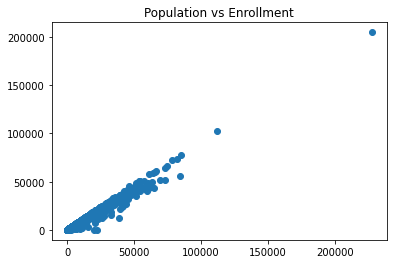

In [92]:
plt.plot(X,Y, linestyle='',marker='o')
plt.title('Population vs Enrollment').figure.savefig('Population_vs_Enrollment.png')

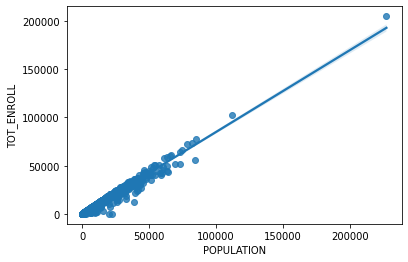

In [93]:
sns.regplot(X, Y, data=df).figure.savefig('Regplot.png')

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

### Create Linear Regression model

In [95]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [96]:
lm.coef_

array([[0.84543691]])

In [97]:
lm.intercept_

array([22.70442192])

In [62]:
lm_y_test = lm.predict(X_test)
lm_y_train = lm.predict(X_train)

print('Train r2 score: ', r2_score(lm_y_train, y_train))
print('Test r2 score: ', r2_score(y_test, lm_y_test)) 
print('Train MAE: ', mean_absolute_error(lm_y_train, y_train))
print('Test MAE: ',mean_absolute_error(y_test, lm_y_test))
print('Train MSE: ', mean_squared_error(lm_y_train, y_train))
print('Test MSE: ',mean_squared_error(y_test, lm_y_test))

Train r2 score:  0.9819861144001455
Test r2 score:  0.9816923218118879
Train MAE:  231.5494600903543
Test MAE:  229.86777539443798
Train MSE:  808259.8912486824
Test MSE:  757975.4924688424


### Create Decision Tree Regression model

In [64]:
dtr1 = DecisionTreeRegressor(max_depth=7)
dtr1.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=7)

In [65]:
dtr_y_test = dtr1.predict(X_test)
dtr_y_train = dtr1.predict(X_train)

print('Train r2 score: ', r2_score(dtr_y_train, y_train))
print('Test r2 score: ', r2_score(y_test, dtr_y_test)) 
print('Train MAE: ', mean_absolute_error(dtr_y_train, y_train))
print('Test MAE: ',mean_absolute_error(y_test, dtr_y_test))
print('Train MSE: ', mean_squared_error(dtr_y_train, y_train))
print('Test MSE: ',mean_squared_error(y_test, dtr_y_test))

Train r2 score:  0.9916790160379184
Test r2 score:  0.9597524325006341
Train MAE:  167.7700568302921
Test MAE:  263.48660348367974
Train MSE:  376940.8531221265
Test MSE:  1666331.9882809622


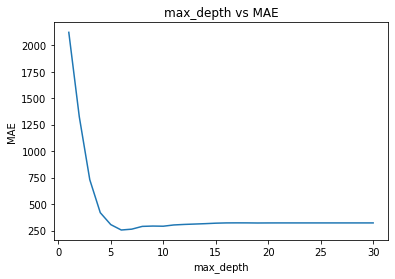

In [67]:
depth = 30
max_depth = [i for i in range(1,depth+1)] 
dtr_mae = [] 
for i in range(1,depth+1):
    dtr = DecisionTreeRegressor(max_depth=i)
    dtr.fit(X_train, y_train)
    dtr_y_pred = dtr.predict(X_test)
    dtr_mae.append(mean_absolute_error(y_test, dtr_y_pred))
    
plt.plot(max_depth, dtr_mae)
plt.xlabel('max_depth')
plt.ylabel('MAE')
plt.title('max_depth vs MAE').figure.savefig('DTR.png')
plt.show()

In [68]:
df_le = df.copy()

In [69]:
d = defaultdict(LabelEncoder)
col_list = [col for col in df_le.columns.tolist() if df_le[col].dtype.name == "object"]

df_le[col_list] = df_le[col_list].apply(lambda x: d[x.name].fit_transform(x))
df_le.drop("BINNED_TOT_ENROLL", 1, inplace=True)
df_le

,IPEDSID,NAME,ADDRESS,CITY,STATE,ZIP,POPULATION,COUNTY,COUNTYFIPS,COUNTRY,...,LONGITUDE,NAICS_CODE,NAICS_DESC,STFIPS,COFIPS,INST_SIZE,PT_ENROLL,FT_ENROLL,TOT_ENROLL,TOT_EMPLOY
0,107840,5846,5743,1478,2,3459,70,764,5119,7,...,-92.260490,611210,7,5,119,1,24,28,52,18
1,112181,1326,6402,410,5,4638,39,808,6067,7,...,-121.289431,611511,3,6,67,1,6,24,30,9
2,116660,3300,1874,1250,5,4231,35,560,6037,7,...,-118.287070,611511,3,6,37,1,0,24,24,11
3,125310,7324,1083,1941,5,4520,43,640,6053,7,...,-121.652662,611511,3,6,53,1,18,16,34,9
4,164368,2899,28,313,22,151,2386,623,25017,7,...,-71.070737,611310,1,25,17,2,0,2243,2243,143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7730,443483,1574,756,890,7,316,163,666,9011,7,...,-72.042638,611519,8,9,11,1,119,19,138,25
7731,443492,5073,908,707,57,1241,3470,588,54049,7,...,-80.160335,611210,7,54,49,2,772,2415,3187,283
7732,443517,6721,6258,464,5,4255,0,560,6037,7,...,-118.236350,611710,4,6,37,1,0,0,0,0
7733,443526,2947,484,602,12,1489,752,345,13121,7,...,-84.176526,611310,1,13,121,1,227,441,668,84


In [70]:
X = df_le.drop(columns=['TOT_ENROLL'])
y = df_le['TOT_ENROLL']

In [71]:
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [72]:
#create model
model = Sequential()

#get number of columns in training data
n_cols = xTrain.shape[1]
n_cols

20

In [73]:
#add model layers
model.add(Dense(100,  input_shape=(n_cols,)))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='relu'))

In [74]:
#compile model using mse as a measure of model performance
model.compile(optimizer='adam', loss='mean_squared_error')

In [75]:
#train model
history = model.fit(xTrain, yTrain, validation_split=0.2, epochs=200, verbose=2)

Epoch 1/200
155/155 - 1s - loss: 47503140.0000 - val_loss: 76588352.0000 - 720ms/epoch - 5ms/step
Epoch 2/200
155/155 - 0s - loss: 47503148.0000 - val_loss: 76588352.0000 - 233ms/epoch - 2ms/step
Epoch 3/200
155/155 - 0s - loss: 47503144.0000 - val_loss: 76588352.0000 - 253ms/epoch - 2ms/step
Epoch 4/200
155/155 - 0s - loss: 47503152.0000 - val_loss: 76588352.0000 - 220ms/epoch - 1ms/step
Epoch 5/200
155/155 - 0s - loss: 47503152.0000 - val_loss: 76588352.0000 - 232ms/epoch - 1ms/step
Epoch 6/200
155/155 - 0s - loss: 47503140.0000 - val_loss: 76588352.0000 - 224ms/epoch - 1ms/step
Epoch 7/200
155/155 - 0s - loss: 47503152.0000 - val_loss: 76588352.0000 - 222ms/epoch - 1ms/step
Epoch 8/200
155/155 - 0s - loss: 47503156.0000 - val_loss: 76588352.0000 - 224ms/epoch - 1ms/step
Epoch 9/200
155/155 - 0s - loss: 47503136.0000 - val_loss: 76588352.0000 - 213ms/epoch - 1ms/step
Epoch 10/200
155/155 - 0s - loss: 47503152.0000 - val_loss: 76588352.0000 - 227ms/epoch - 1ms/step
Epoch 11/200
155/15

Epoch 84/200
155/155 - 0s - loss: 47503152.0000 - val_loss: 76588352.0000 - 229ms/epoch - 1ms/step
Epoch 85/200
155/155 - 0s - loss: 47503152.0000 - val_loss: 76588352.0000 - 212ms/epoch - 1ms/step
Epoch 86/200
155/155 - 0s - loss: 47503164.0000 - val_loss: 76588352.0000 - 222ms/epoch - 1ms/step
Epoch 87/200
155/155 - 0s - loss: 47503144.0000 - val_loss: 76588352.0000 - 214ms/epoch - 1ms/step
Epoch 88/200
155/155 - 0s - loss: 47503160.0000 - val_loss: 76588352.0000 - 209ms/epoch - 1ms/step
Epoch 89/200
155/155 - 0s - loss: 47503140.0000 - val_loss: 76588352.0000 - 213ms/epoch - 1ms/step
Epoch 90/200
155/155 - 0s - loss: 47503140.0000 - val_loss: 76588352.0000 - 210ms/epoch - 1ms/step
Epoch 91/200
155/155 - 0s - loss: 47503144.0000 - val_loss: 76588352.0000 - 223ms/epoch - 1ms/step
Epoch 92/200
155/155 - 0s - loss: 47503172.0000 - val_loss: 76588352.0000 - 225ms/epoch - 1ms/step
Epoch 93/200
155/155 - 0s - loss: 47503140.0000 - val_loss: 76588352.0000 - 233ms/epoch - 2ms/step
Epoch 94/2

155/155 - 0s - loss: 47503152.0000 - val_loss: 76588352.0000 - 278ms/epoch - 2ms/step
Epoch 167/200
155/155 - 0s - loss: 47503160.0000 - val_loss: 76588352.0000 - 217ms/epoch - 1ms/step
Epoch 168/200
155/155 - 0s - loss: 47503152.0000 - val_loss: 76588352.0000 - 271ms/epoch - 2ms/step
Epoch 169/200
155/155 - 0s - loss: 47503148.0000 - val_loss: 76588352.0000 - 269ms/epoch - 2ms/step
Epoch 170/200
155/155 - 0s - loss: 47503140.0000 - val_loss: 76588352.0000 - 271ms/epoch - 2ms/step
Epoch 171/200
155/155 - 0s - loss: 47503152.0000 - val_loss: 76588352.0000 - 288ms/epoch - 2ms/step
Epoch 172/200
155/155 - 0s - loss: 47503152.0000 - val_loss: 76588352.0000 - 222ms/epoch - 1ms/step
Epoch 173/200
155/155 - 0s - loss: 47503136.0000 - val_loss: 76588352.0000 - 261ms/epoch - 2ms/step
Epoch 174/200
155/155 - 0s - loss: 47503144.0000 - val_loss: 76588352.0000 - 214ms/epoch - 1ms/step
Epoch 175/200
155/155 - 0s - loss: 47503148.0000 - val_loss: 76588352.0000 - 253ms/epoch - 2ms/step
Epoch 176/200


In [76]:
nn_y_test = model.predict(xTest)
nn_y_train = model.predict(xTrain)

In [77]:
print('Train r2 score: ', r2_score(yTrain, nn_y_train))
print('Test r2 score: ', r2_score(yTest, nn_y_test)) 
print('Train MAE: ', mean_absolute_error(yTrain, nn_y_train))
print('Test MAE: ',mean_absolute_error(yTest, nn_y_test))
print('Train MSE: ', mean_squared_error(yTrain, nn_y_train))
print('Test MSE: ',mean_squared_error(yTest, nn_y_test))

Train r2 score:  -0.16737308902767123
Test r2 score:  -0.18106723382770928
Train MAE:  2764.9767291532
Test MAE:  2737.983839689722
Train MSE:  53322070.77246283
Test MSE:  48898610.13510019


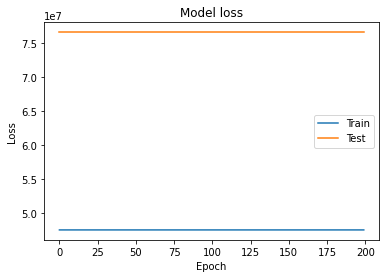

In [78]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best').figure.savefig('NN.png')
plt.show()

### Data visualization for prediction of regression model

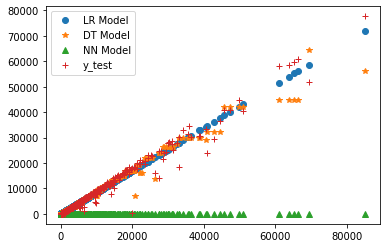

In [79]:
plt.plot(X_test,lm_y_test, linestyle='',marker='o', label='LR Model')
plt.plot(X_test,dtr_y_test, linestyle='',marker='*', label='DT Model')
plt.plot(X_test,nn_y_test, linestyle='',marker='^', label='NN Model')
plt.plot(X_test,y_test, linestyle='',marker='+', label='y_test')
plt.ticklabel_format(style='plain')
plt.legend().figure.savefig('Predicted_Enrollment.png')

### Model prediction 

In [80]:
real_X = df_junior[['POPESTIMATE2021']]
real_X

,POPESTIMATE2021
0,28643
16,21335
26,139030
37,13380
38,48445
...,...
7715,71995
7723,6571
7726,139030
7731,4032


In [81]:
df_nn = df_junior.copy()
df_nn.drop(['POPULATION'], 1, inplace=True)
df_nn.rename(columns ={'POPESTIMATE2021':'POPULATION'}, inplace=True)
df_nn

,IPEDSID,NAME,ADDRESS,CITY,STATE,ZIP,COUNTY,COUNTYFIPS,COUNTRY,LATITUDE,...,NAICS_CODE,NAICS_DESC,STFIPS,COFIPS,INST_SIZE,PT_ENROLL,FT_ENROLL,TOT_ENROLL,TOT_EMPLOY,POPULATION
0,107840,Shorter College,604 Locust St,N Little Rock,AR,72114,Pulaski,5119,US,34.759308,...,611210,Junior Colleges,5,119,1,24,28,52,18,28643
16,475352,Virginia College-Savannah,"14045 Abercorn Street, Suite 1503",Savannah,GA,31419,Chatham,13051,US,31.983580,...,611210,Junior Colleges,13,51,1,177,586,763,139,21335
26,475477,City College-Hollywood,6565 Taft Street,Hollywood,FL,33024,Broward,12011,US,26.025270,...,611210,Junior Colleges,12,11,1,18,47,65,17,139030
37,475583,Bryan University,3215 LeMone Industrial Boulevard,Columbia,MO,65201,Boone,29019,US,38.915735,...,611210,Junior Colleges,29,19,1,0,121,121,33,13380
38,475592,Virginia College-Tulsa,5124 South Peoria Avenue,Tulsa,OK,74105,Tulsa,40143,US,36.088311,...,611210,Junior Colleges,40,143,1,17,143,160,71,48445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7715,443270,Southeastern College-Jacksonville,"6700 Southpoint Parkway, Suite 400",Jacksonville,FL,32216,Duval,12031,US,30.220468,...,611210,Junior Colleges,12,31,1,45,165,210,103,71995
7723,443377,Triangle Tech Inc-Sunbury,191 Performance Road,Sunbury,PA,17801,Northumberland,42097,US,40.855276,...,611210,Junior Colleges,42,97,1,0,105,105,22,6571
7726,443438,Medvance Institute-Fort Lauderdale,"4850 W. Oakland Park Blvd., Suite 200",Lauderdale Lakes,FL,33313,Broward,12011,US,26.162566,...,611210,Junior Colleges,12,11,1,0,331,331,34,139030
7731,443492,Pierpont Community and Technical College,1201 Locust Ave,Fairmont,WV,26554,Marion,54049,US,39.482878,...,611210,Junior Colleges,54,49,2,772,2415,3187,283,4032


In [82]:
col_list = [col for col in df_nn.columns.tolist() if df_nn[col].dtype.name == "object"]

df_nn[col_list] = df_nn[col_list].apply(lambda x: d[x.name].fit_transform(x))
nn_real_X = df_nn.drop('TOT_ENROLL', 1)

In [83]:
lm_y_pred = lm.predict(real_X)
drt_y_pred = dtr1.predict(real_X)
nn_y_pred = model.predict(nn_real_X)
lm_y_pred = pd.DataFrame(lm_y_pred, columns=['LR'])
drt_y_pred = pd.DataFrame(drt_y_pred, columns=['DT'])
nn_y_pred = pd.DataFrame(nn_y_pred, columns=['NN'])

In [84]:
lm_y_pred = lm_y_pred.astype(int)
drt_y_pred = drt_y_pred.astype(int)
nn_y_pred = nn_y_pred.astype(int)

In [85]:
df_new = pd.concat([df_junior.reset_index(drop=True), lm_y_pred, drt_y_pred, nn_y_pred], axis=1) 

df_new

,IPEDSID,NAME,ADDRESS,CITY,STATE,ZIP,POPULATION,COUNTY,COUNTYFIPS,COUNTRY,...,COFIPS,INST_SIZE,PT_ENROLL,FT_ENROLL,TOT_ENROLL,TOT_EMPLOY,POPESTIMATE2021,LR,DT,NN
0,107840,Shorter College,604 Locust St,N Little Rock,AR,72114,70,Pulaski,5119,US,...,119,1,24,28,52,18,28643,24238,26222,23124
1,475352,Virginia College-Savannah,"14045 Abercorn Street, Suite 1503",Savannah,GA,31419,902,Chatham,13051,US,...,51,1,177,586,763,139,21335,18060,19147,58740
2,475477,City College-Hollywood,6565 Taft Street,Hollywood,FL,33024,82,Broward,12011,US,...,11,1,18,47,65,17,139030,117563,102887,72323
3,475583,Bryan University,3215 LeMone Industrial Boulevard,Columbia,MO,65201,154,Boone,29019,US,...,19,1,0,121,121,33,13380,11334,11460,54358
4,475592,Virginia College-Tulsa,5124 South Peoria Avenue,Tulsa,OK,74105,231,Tulsa,40143,US,...,143,1,17,143,160,71,48445,40979,42109,55871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993,443270,Southeastern College-Jacksonville,"6700 Southpoint Parkway, Suite 400",Jacksonville,FL,32216,313,Duval,12031,US,...,31,1,45,165,210,103,71995,60889,64514,63894
1994,443377,Triangle Tech Inc-Sunbury,191 Performance Road,Sunbury,PA,17801,127,Northumberland,42097,US,...,97,1,0,105,105,22,6571,5578,5690,48033
1995,443438,Medvance Institute-Fort Lauderdale,"4850 W. Oakland Park Blvd., Suite 200",Lauderdale Lakes,FL,33313,365,Broward,12011,US,...,11,1,0,331,331,34,139030,117563,102887,70792
1996,443492,Pierpont Community and Technical College,1201 Locust Ave,Fairmont,WV,26554,3470,Marion,54049,US,...,49,2,772,2415,3187,283,4032,3431,3568,45202


### Data visualization

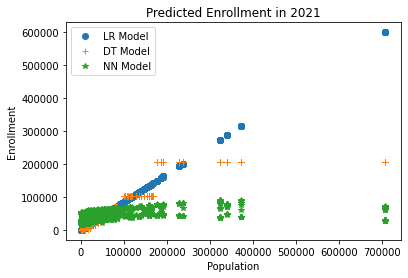

In [86]:
plt.plot(df_new['POPESTIMATE2021'],df_new['LR'], linestyle='',marker='o', label='LR Model')
plt.plot(df_new['POPESTIMATE2021'],df_new['DT'], linestyle='',marker='+', label='DT Model')
plt.plot(df_new['POPESTIMATE2021'],df_new['NN'], linestyle='',marker='*', label='NN Model')
plt.xlabel('Population')
plt.ylabel('Enrollment')
plt.title('Predicted Enrollment in 2021')
plt.ticklabel_format(style='plain')
plt.legend().figure.savefig('Predicted_Enrollment_2021.png')

In [87]:
print('LR mean: ', df_new['LR'].mean())
print('DT mean: ', df_new['DT'].mean())
print('NN mean: ', df_new['NN'].mean())

LR mean:  64604.514014014014
DT mean:  50456.331831831834
NN mean:  40639.36986986987


### Causal Question

**“Will an increase in the size of institutions increase the total enrollment of students of colleges and universities in the US?”**

In [88]:
df2 = df_min_max_scaled.copy()
filter = df2['INST_SIZE'] > 0
df2 = df2[filter]
df2.head()

,IPEDSID,NAME,ADDRESS,CITY,STATE,ZIP,POPULATION,COUNTY,COUNTYFIPS,COUNTRY,...,NAICS_CODE,NAICS_DESC,STFIPS,COFIPS,INST_SIZE,PT_ENROLL,FT_ENROLL,TOT_ENROLL,TOT_EMPLOY,BINNED_TOT_ENROLL
0,107840,Shorter College,604 Locust St,N Little Rock,AR,72114,70,Pulaski,5119,US,...,611210,Junior Colleges,5,119,1,24,28,52,18,Low
1,112181,Citrus Heights Beauty College,7518 Baird Way,Citris Heights,CA,95610,39,Sacramento,6067,US,...,611511,Cosmetology and Barber Schools,6,67,1,6,24,30,9,Low
2,116660,Joe Blasco Makeup Artist Training Center,1670 Hillhurst Avenue,Los Angeles,CA,90027,35,Los Angeles,6037,US,...,611511,Cosmetology and Barber Schools,6,37,1,0,24,24,11,Low
3,125310,Waynes College of Beauty,1271 North Main Street,Salinas,CA,93906,43,Monterey,6053,US,...,611511,Cosmetology and Barber Schools,6,53,1,18,16,34,9,Low
4,164368,Hult International Business School,1 Education Street,Cambridge,MA,02141,2386,Middlesex,25017,US,...,611310,"Colleges, Universities, and Professional Schools",25,17,2,0,2243,2243,143,Low


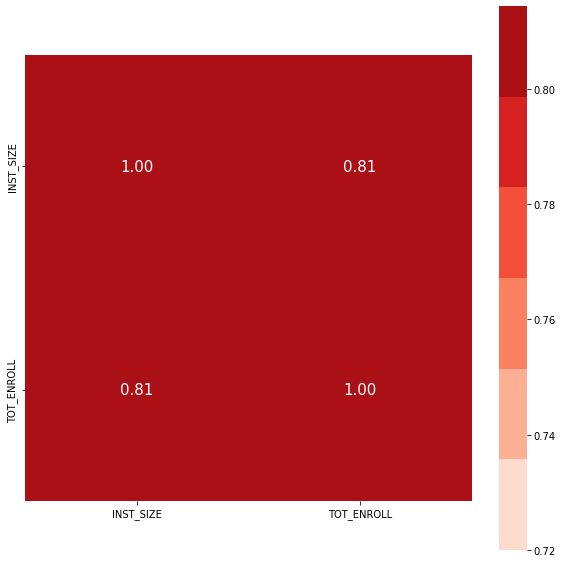

In [89]:
corr_list = list(['INST_SIZE', 'TOT_ENROLL'])
corr = df2[corr_list].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr , vmax=.8, square=True, annot=True, fmt= '.2f', annot_kws={'size': 15}, cmap=sns.color_palette("Reds")).figure.savefig('Heatmap3.png')

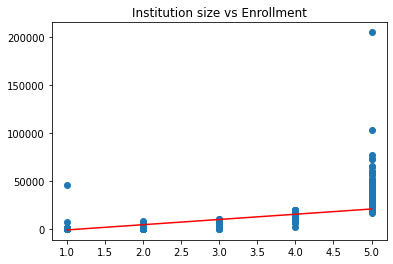

In [90]:
plt.scatter(df2['INST_SIZE'],df2['TOT_ENROLL'])
plt.plot(np.unique(df2['INST_SIZE']), np.poly1d(np.polyfit(df2['INST_SIZE'], df2['TOT_ENROLL'], 1))
         (np.unique(df2['INST_SIZE'])), color='red')
plt.title('Institution size vs Enrollment').figure.savefig('Inst_vs_Enrollment_Regplot.png')